## Analysis of an E-Commerce Dataset
### Introduction   
The dataset contains records on users' product ratings and reviews on an e-commerce platform. Auser may rate multiple items and an item may receive ratings and reviews from multiple users. Users can also evaluate each other's ratings and reviews.   

This dataset includes details about:   
- **User profile**: ID, gender, city of birth   
- **Ratings & Reviews**: ratings (on a scale of 1-5), reviews, timestamp, average helpfulness of the rating given by others (on a scale of 1-5)   
- **Product**: product name, ID, price, category

Below are the descriptions of the columns of this dataset:   

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating.
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth   

### Part 1. EDA

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

c:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# import csv file
ec = pd.read_csv('E-commerce Dataset.csv')

# display dataframe
ec.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [ ]:
# display information
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [46]:
# count null values
print(f"Total number of null values by variable:\n{ec.isnull().sum()}")

Total number of null values by variable:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [48]:
# print length before removing null records
print(f"Total number of records - before removing null values: {len(ec)}")

# remove missing data - as the percentage is < 5%
ec_clean = ec.dropna()

# print length after
print(f"Total number of records - after removing null values: {len(ec_clean)}")

Total number of records - before removing null values: 20000
Total number of records - after removing null values: 19934


In [49]:
## total number of unique users, reviews, items, and categories
print("Number of unique users:", ec_clean.userId.nunique())
print("Number of unique items:", ec_clean.item.nunique())
print("Number of unique categories:", ec_clean.category.nunique())
print("Number of unique cities:", ec_clean.user_city.nunique())

Number of unique users: 8565
Number of unique items: 89
Number of unique categories: 9
Number of unique cities: 40


In [50]:
print("Average ratings: ", ec_clean["rating"].mean().round(2))
print("Average helpfulness ratings: ", ec_clean["helpfulness"].mean().round(2))

Average ratings:  3.7
Average helpfulness ratings:  2.6


In [52]:
five_star_ratings = ec_clean[ec_clean['rating'] == 5]
top_items = five_star_ratings.groupby("item")["rating"].count().reset_index()
top_items = top_items.sort_values(by="rating", ascending=False)
print(f"Top 5 items that receive the most 5 ratings:\n{top_items.head(5)}")

Top 5 items that receive the most 5 ratings:
             item  rating
88           eBay     334
40         Matrix     263
33     Green Mile     250
80    Toy Story 2     249
1   All Advantage     239


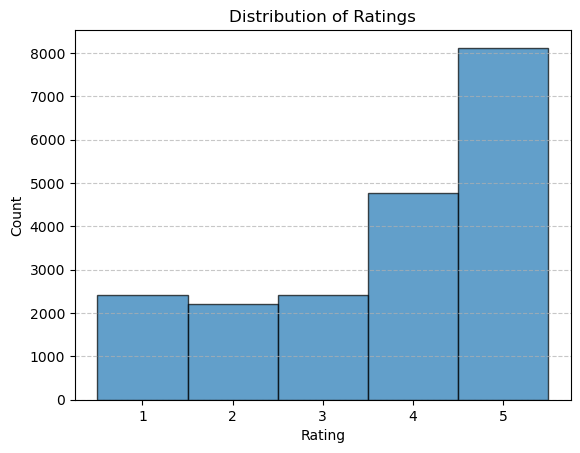

In [53]:
# plot the number or ratings
plt.hist(ec_clean["rating"], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

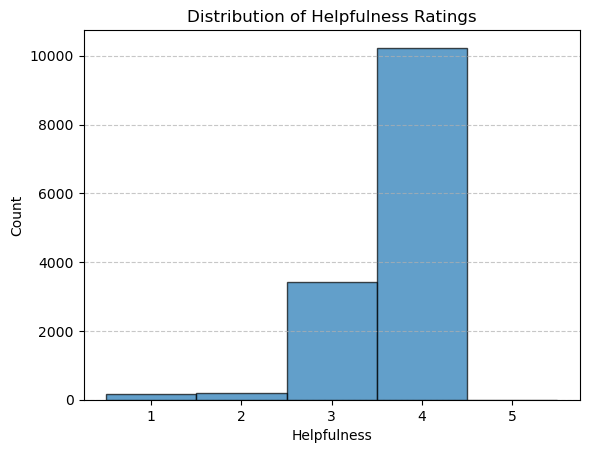

In [54]:
# plot the number of helpfulness ratings
plt.hist(ec_clean["helpfulness"], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)

plt.xlabel("Helpfulness")
plt.ylabel("Count")
plt.title("Distribution of Helpfulness Ratings")
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

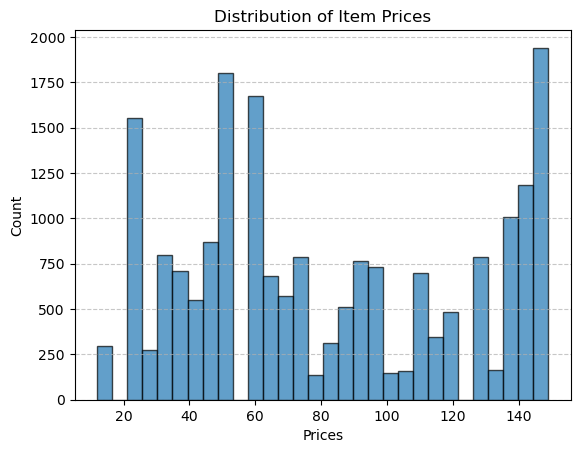

In [55]:
# plot distribution of item prices
plt.hist(ec_clean["item_price"], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel("Prices")
plt.ylabel("Count")
plt.title("Distribution of Item Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [56]:
# count the number of items rated by gender
ec_clean.groupby("gender")["item"].count()

gender
F     9799
M    10135
Name: item, dtype: int64

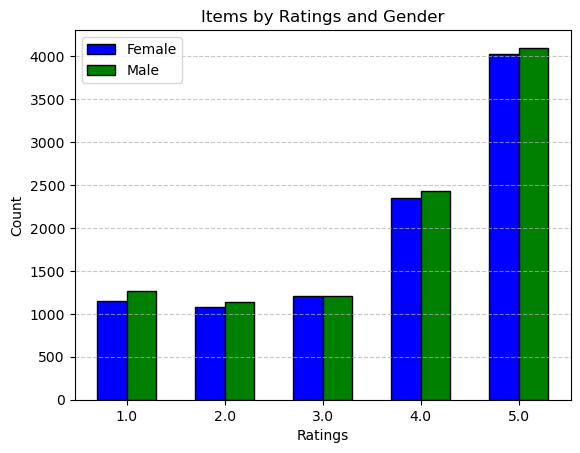

In [57]:
# plot distribution of ratings by gender
rating_counts = ec_clean.groupby(["rating", "gender"]).size().unstack()

ratings = rating_counts.index
width = 0.3
x = np.arange(len(ratings))

plt.bar(x - width/2, rating_counts["F"], width=width, color='b', edgecolor='black', label='Female')
plt.bar(x + width/2, rating_counts["M"], width=width, color='g', edgecolor='black', label='Male')

plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Items by Ratings and Gender")
plt.xticks(x, ratings)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

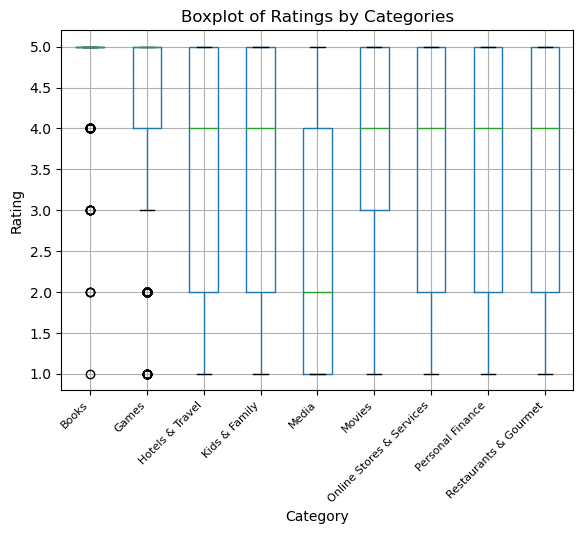

In [58]:
# plot rating by category
ec_clean.boxplot('rating', by='category').get_figure().suptitle('')

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Boxplot of Ratings by Categories')
plt.xlabel('Category')
plt.ylabel('Rating')

plt.show()

In [39]:
# Find correlation between helpfulness/gender/category/review and rating
## Convert categorical columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ec_clean[['gender', 'category']] = enc.fit_transform(ec_clean[['gender', 'category']])
ec_clean.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,6961,88,5.0,2.0,0.0,6.0,88,149.00,39
1,4052,122899,5685,46,5.0,0.0,0.0,6.0,46,53.00,39
2,33,12700,1473,0,5.0,4.0,0.0,6.0,0,145.84,31
3,33,21000,4692,88,5.0,4.0,0.0,6.0,88,149.00,31
4,33,22300,3164,12,1.0,4.0,0.0,5.0,12,44.00,31


<Axes: >

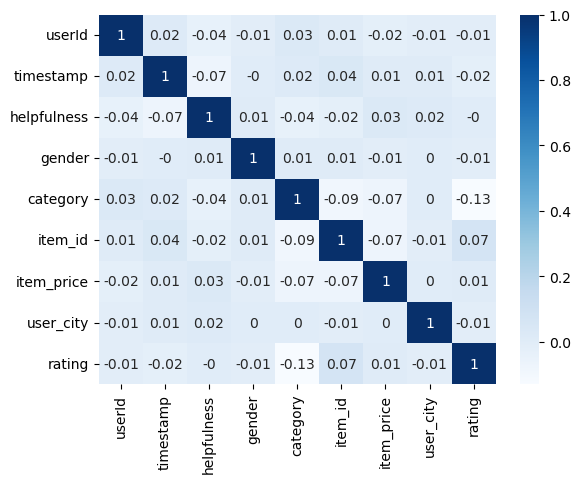

In [31]:
## Find correlation - heatmap
corr = ec_clean[['userId', 'timestamp', 'helpfulness', 'gender', 'category', 'item_id', 'item_price', 'user_city', 'rating']].corr().round(2)

sns.heatmap(corr, cmap="Blues", annot=True)

#### Analysis
The plot shows the correlation of category and rating. The ratings are different between the categories, so there is correlation between the two.
- For Books: people rate really high for this category, with most are 5.0 rating. 
- For Games: people also rate quite high in this category, with the distribution ranging from 4.0 to 5.0, with some outliers of 1.0 and 2.0.
- For Media: this is the category that receives the lowest rating. The distribution of the rating is from 1.0 to 4.0, with 50% of the ratings are between 1.0 to 2.0. 
- For Movies: again, the ratings are quite high, with the distribution ranging from 3.0 to 5.0.
- The remaining categories have similar spreads and distributions.   

#### Analysis of Correlations
- Overall, all 4 features have very weak and negative correlations with rating  
=> This is similar to what we found from boxplots of these features and rating in Portfolio 1. 
- The most correlated feature regarding rating: category (-0.163)
- The least correlated feature regarding rating: helpfulness (-0.008)
- Because of their weak correlations, these features are not useful in predicting rating, and therefore will result in incorrect prediction results. If we train a regression model on these features, the model probably will not follow linear regression and the points will be very scattered.  

### Part 2. Building Regression Models

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Case 1
train, test = train_test_split(ec_clean, test_size=0.2)
print(train.shape)
print(test.shape)

(15947, 11)
(3987, 11)


#### 1. Linear Regression      

In [19]:
# model
reg = linear_model.LinearRegression()
x_train = train.drop(columns=['rating', 'review', 'item'])
y_train = train['rating']

x_test = test.drop(columns=['rating', 'review', 'item'])
y_test = test['rating']

reg.fit(x_train, y_train)

LinearRegression()

In [44]:
# model
y_pred = reg.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = ((np.array(y_test)-y_pred)**2).sum()/len(y_test)

print("R² Score:", r2)
print("MSE:", mse)
print("Root MSE", np.sqrt(mse))

R² Score: 0.02018294566637513
MSE: 1.9019926808493774
Root MSE 1.3791275071034503


**Analysis**
- However, MSE and Root MSE values from all 4 models are much higher than 0, suggesting that all models are not useful in predicting 'rating'.   

#### 2. Logistic Regression Model

In [62]:
# fit model on train dataset - without feature selection
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [63]:
# prediction 
y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

In [64]:
# evaluate the performance 
print("Accuracy score on training set: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_test_pred))

Accuracy score on training set:  0.40778829873957484
Accuracy score on testing set:  0.40305994482066715


In [35]:
# feature selection
rfe = RFE(estimator = logit, n_features_to_select = 5, step = 1)
rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [36]:
# evaluation on feature selection
y_test_pred_rfe = rfe.predict(x_test)
print("Accuracy score on test set: ", accuracy_score(y_test, y_test_pred_rfe))

Accuracy score on test set:  0.4040632054176072


In [37]:
# summarise all features
for i in range(x_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 2.000
Column: 7, Selected True, Rank: 1.000


In [40]:
# fit model on train dataset - with feature selection
x_train_fs = train[['helpfulness', 'gender', 'category', 'item_id', 'user_city']]
y_train_fs = train['rating']

x_test_fs = test[['helpfulness', 'gender', 'category', 'item_id', 'user_city']]
y_test_fs = test['rating']

logit.fit(x_train_fs, y_train_fs)

LogisticRegression()

In [ ]:
# prediction - with feature selection
y_train_pred_fs = logit.predict(x_train_fs)
y_test_pred_fs = logit.predict(x_test_fs)

In [42]:
# evaluation of model - with feature selection
print("Accuracy score on training set: ", accuracy_score(y_train_fs, y_train_pred_fs))
print("Accuracy score on testing set: ", accuracy_score(y_test_fs, y_test_pred_fs))

Accuracy score on training set:  0.40835266821345706
Accuracy score on testing set:  0.4040632054176072


**Model Evaluation**: After feature selection, the model performs better. The accuracy score on both training and testing set increase only a little bit.